In [6]:
from pandas import read_csv,datetime,isnull

In [4]:
path = 'C:\\Users\\Acássio\\Documents\\Projetos\\Trebeschi_ML\\trebeschi-ml'
file = 'trebeschi_nova.csv'
#Parse the date variables from strig to datetime
dateparse = lambda x: datetime.strptime(x, '%d%b%y:%H:%M:%S')
base = read_csv(path + "\\" + file,parse_dates=['﻿t_ini', 't_fim'],
                   date_parser=dateparse)
base.rename(columns = {'﻿t_ini':'t_ini'}, inplace = True)

In [7]:
def drop_columns(base,lista,lista_not = None, copy = False):
    if copy == True:
        base_new = base.copy()
    else:
        base_new = base
        
    if type(lista) == list or type(lista) == str:
        if type(lista) == list:
            for element in lista:
                for not_delete in lista_not:
                    base_new.drop([col for col in base_new.columns if element in col and not_delete not in col], axis=1, 
                                  inplace=True)
        else:
            base_new.drop([col for col in base_new.columns if lista in col], axis=1, inplace=True)
    else:
        return None
    return base_new

In [8]:
base_new = drop_columns(base,['_t1','_t2','_t3','_var','_median',
                              'dpv_media','dpv_max','dpv_min','dpv_var','dpv_median'],['_t10'],
                        True)
base_new = drop_columns(base_new,['dpv_media','dpv_max','dpv_min','dpv_var','dpv_median'],['_t4'],
                        True)

In [11]:
base_new.columns

Index(['t_ini', 't_fim', 'temp_media_t4', 'temp_max_t4', 'temp_min_t4',
       'temp_media_t5', 'temp_max_t5', 'temp_min_t5', 'temp_media_t6',
       'temp_max_t6', 'temp_min_t6', 'temp_media_t7', 'temp_max_t7',
       'temp_min_t7', 'temp_media_t8', 'temp_max_t8', 'temp_min_t8',
       'temp_media_t9', 'temp_max_t9', 'temp_min_t9', 'temp_media_t10',
       'temp_max_t10', 'temp_min_t10', 'temp_var_t10', 'temp_median_t10',
       'umi_media_t4', 'umi_max_t4', 'umi_min_t4', 'umi_media_t5',
       'umi_max_t5', 'umi_min_t5', 'umi_media_t6', 'umi_max_t6', 'umi_min_t6',
       'umi_media_t7', 'umi_max_t7', 'umi_min_t7', 'umi_media_t8',
       'umi_max_t8', 'umi_min_t8', 'umi_media_t9', 'umi_max_t9', 'umi_min_t9',
       'umi_media_t10', 'umi_max_t10', 'umi_min_t10', 'umi_var_t10',
       'umi_median_t10', 'radi_media_t4', 'radi_max_t4', 'radi_min_t4',
       'radi_media_t5', 'radi_max_t5', 'radi_min_t5', 'radi_media_t6',
       'radi_max_t6', 'radi_min_t6', 'radi_media_t7', 'radi_max_t7',


In [15]:
from numpy import isnan,count_nonzero,int64
from seaborn import barplot, plt

In [16]:
def num_missings(base,preffix):
    cols  = []
    for col in base.columns:
        if preffix in col:
            if base[col].dtype == float or base[col].dtype == int64:
                cols.append([col,count_nonzero(isnan(base[col])),count_nonzero(~isnan(base[col]))])
                         
    plot2= barplot([line[0] for line in cols], [line[1] + line[2] for line in cols], color="green")
    plot1= barplot([line[0] for line in cols], [line[1] for line in cols], color = 'blue')
    plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90)
    plt.show()
    print(cols)

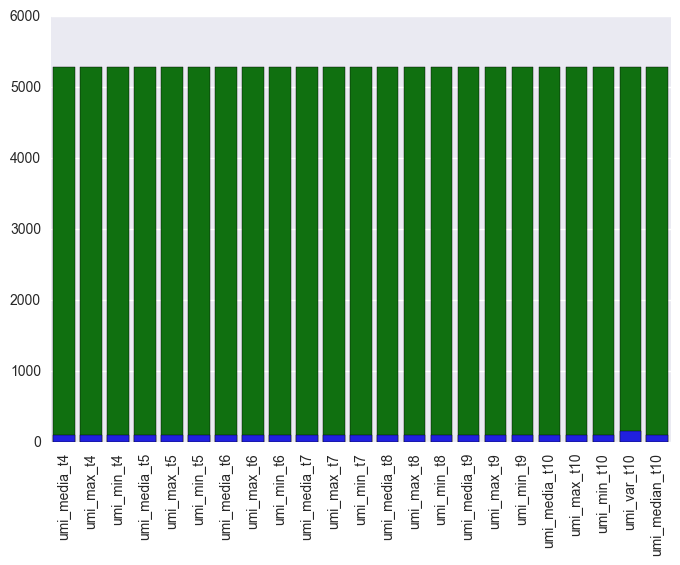

[['umi_media_t4', 98, 5185], ['umi_max_t4', 98, 5185], ['umi_min_t4', 98, 5185], ['umi_media_t5', 99, 5184], ['umi_max_t5', 99, 5184], ['umi_min_t5', 99, 5184], ['umi_media_t6', 100, 5183], ['umi_max_t6', 100, 5183], ['umi_min_t6', 100, 5183], ['umi_media_t7', 101, 5182], ['umi_max_t7', 101, 5182], ['umi_min_t7', 101, 5182], ['umi_media_t8', 102, 5181], ['umi_max_t8', 102, 5181], ['umi_min_t8', 102, 5181], ['umi_media_t9', 103, 5180], ['umi_max_t9', 103, 5180], ['umi_min_t9', 103, 5180], ['umi_media_t10', 104, 5179], ['umi_max_t10', 104, 5179], ['umi_min_t10', 104, 5179], ['umi_var_t10', 160, 5123], ['umi_median_t10', 104, 5179]]


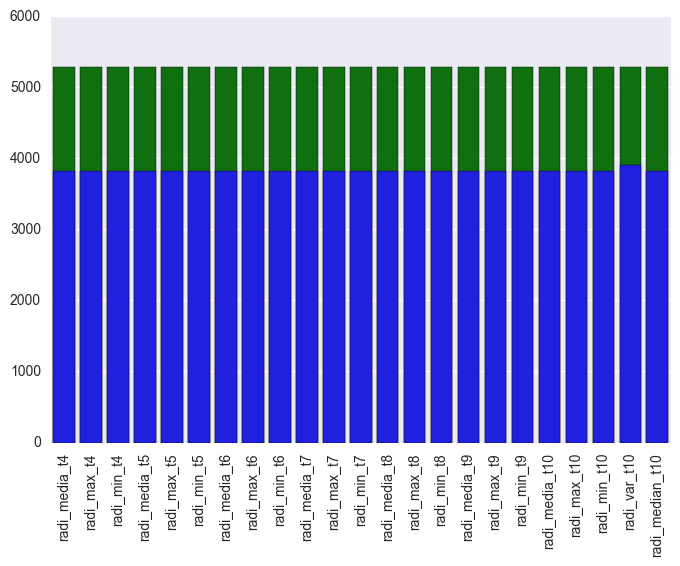

[['radi_media_t4', 3824, 1459], ['radi_max_t4', 3824, 1459], ['radi_min_t4', 3824, 1459], ['radi_media_t5', 3824, 1459], ['radi_max_t5', 3824, 1459], ['radi_min_t5', 3824, 1459], ['radi_media_t6', 3824, 1459], ['radi_max_t6', 3824, 1459], ['radi_min_t6', 3824, 1459], ['radi_media_t7', 3824, 1459], ['radi_max_t7', 3824, 1459], ['radi_min_t7', 3824, 1459], ['radi_media_t8', 3824, 1459], ['radi_max_t8', 3824, 1459], ['radi_min_t8', 3824, 1459], ['radi_media_t9', 3824, 1459], ['radi_max_t9', 3824, 1459], ['radi_min_t9', 3824, 1459], ['radi_media_t10', 3824, 1459], ['radi_max_t10', 3824, 1459], ['radi_min_t10', 3824, 1459], ['radi_var_t10', 3901, 1382], ['radi_median_t10', 3824, 1459]]


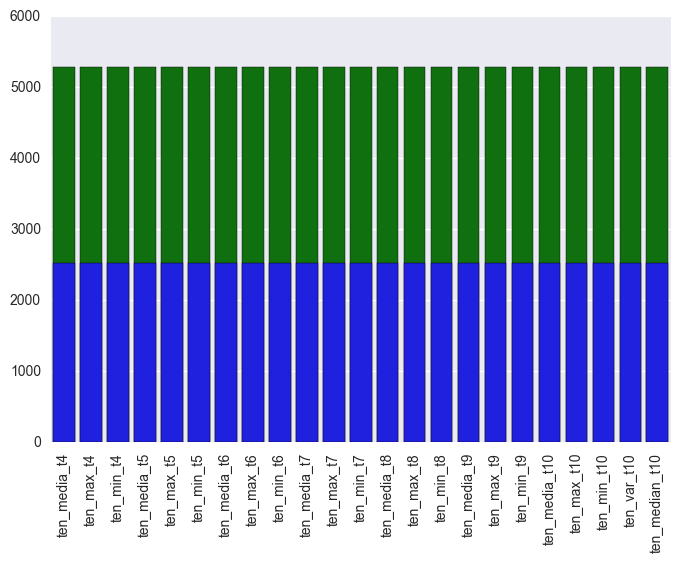

[['ten_media_t4', 2520, 2763], ['ten_max_t4', 2520, 2763], ['ten_min_t4', 2520, 2763], ['ten_media_t5', 2521, 2762], ['ten_max_t5', 2521, 2762], ['ten_min_t5', 2521, 2762], ['ten_media_t6', 2522, 2761], ['ten_max_t6', 2522, 2761], ['ten_min_t6', 2522, 2761], ['ten_media_t7', 2523, 2760], ['ten_max_t7', 2523, 2760], ['ten_min_t7', 2523, 2760], ['ten_media_t8', 2524, 2759], ['ten_max_t8', 2524, 2759], ['ten_min_t8', 2524, 2759], ['ten_media_t9', 2525, 2758], ['ten_max_t9', 2525, 2758], ['ten_min_t9', 2525, 2758], ['ten_media_t10', 2526, 2757], ['ten_max_t10', 2526, 2757], ['ten_min_t10', 2526, 2757], ['ten_var_t10', 2527, 2756], ['ten_median_t10', 2526, 2757]]


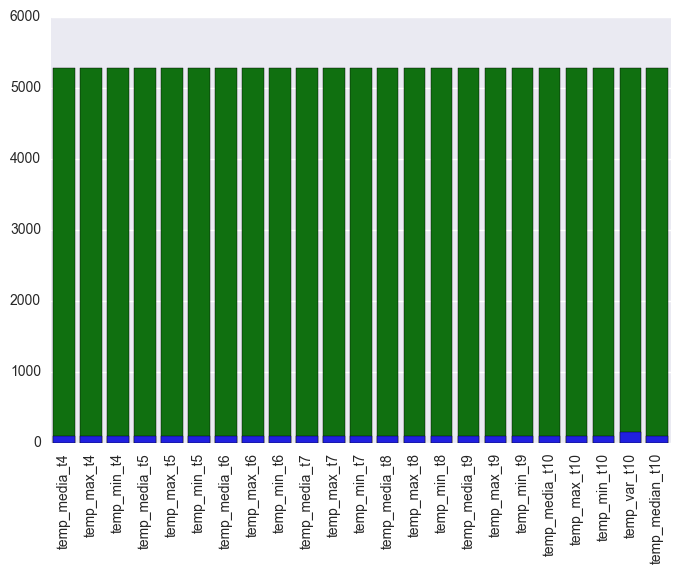

[['temp_media_t4', 98, 5185], ['temp_max_t4', 98, 5185], ['temp_min_t4', 98, 5185], ['temp_media_t5', 99, 5184], ['temp_max_t5', 99, 5184], ['temp_min_t5', 99, 5184], ['temp_media_t6', 100, 5183], ['temp_max_t6', 100, 5183], ['temp_min_t6', 100, 5183], ['temp_media_t7', 101, 5182], ['temp_max_t7', 101, 5182], ['temp_min_t7', 101, 5182], ['temp_media_t8', 102, 5181], ['temp_max_t8', 102, 5181], ['temp_min_t8', 102, 5181], ['temp_media_t9', 103, 5180], ['temp_max_t9', 103, 5180], ['temp_min_t9', 103, 5180], ['temp_media_t10', 104, 5179], ['temp_max_t10', 104, 5179], ['temp_min_t10', 104, 5179], ['temp_var_t10', 160, 5123], ['temp_median_t10', 104, 5179]]


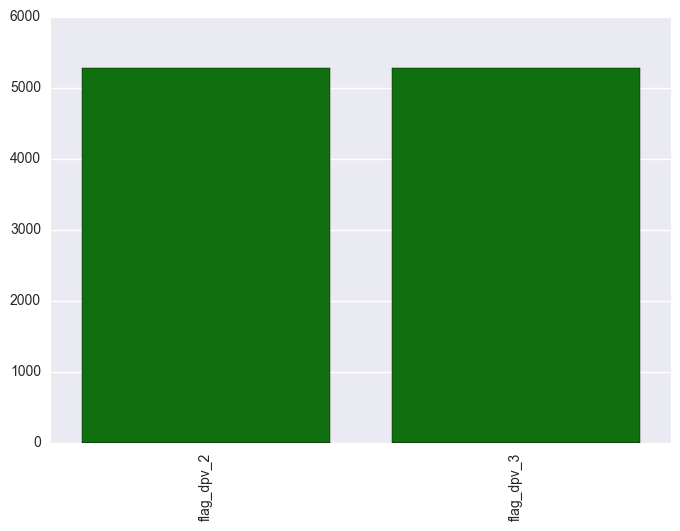

[['flag_dpv_2', 0, 5283], ['flag_dpv_3', 0, 5283]]


In [17]:
num_missings(base_new,'umi')
num_missings(base_new,'radi')
num_missings(base_new,'ten')
num_missings(base_new,'temp')
num_missings(base_new,'dpv')

In [29]:
missing_data_cond = lambda x: x ==1
cols_no = []
cond = isnull(base[base.columns.difference(cols_no)]) | missing_data_cond(base[base.columns.difference(cols_no)])

In [101]:
from scipy.stats import mode, itemfreq
import numpy as np
from statistics import mode
func = lambda x : mode(x)
a = ['a','b','a']
func(base['flag_dpv_2'])

-1

In [111]:
np.issubdtype(base.temp_media_t4.dtype, np.number)

True

dtype('<M8[ns]')